Data Set download link: https://www.kaggle.com/datasets/shivamb/netflix-shows

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("netflix_titles.csv")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data["date_added"] = pd.to_datetime(
    data["date_added"], format="%B %d, %Y", errors="coerce"
)


print(data["date_added"].dtypes)

datetime64[ns]


### Practice Question 1

Goal: Explore and visualize the distribution of content types.


type
Movie      6131
TV Show    2676
Name: count, dtype: int64


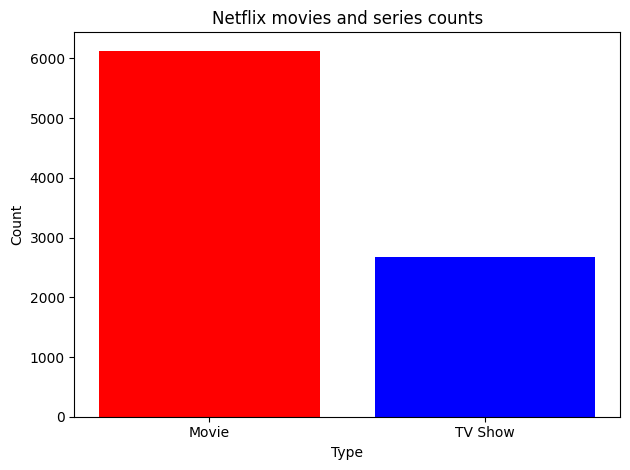

In [5]:
type_counts = data["type"].value_counts()
print(type_counts)

plt.bar(
    type_counts.index,
    type_counts.values,
    color=["red", "blue"],
    label="Count of movies and shows",
)
plt.title("Netflix movies and series counts")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Practice Question 2

Goal: Understand Netflix content growth over time.


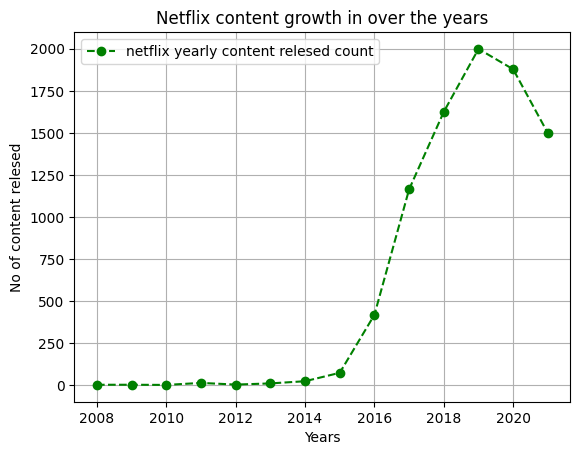

In [6]:
total_reles_year = (
    data.groupby(data["date_added"].dt.year)["type"]
    .value_counts()
    .unstack(fill_value=0)
    .sum(axis=1)
)

plt.plot(
    total_reles_year.index,
    total_reles_year.values,
    color="green",
    linestyle="--",
    marker="o",
    label="netflix yearly content relesed count",
)
plt.title("Netflix content growth in over the years")
plt.xlabel("Years")
plt.ylabel("No of content relesed")
plt.legend()
plt.grid()
plt.show()

### Practice Question 3

Goal: Compare Netflix’s growth in Movies vs TV Shows.


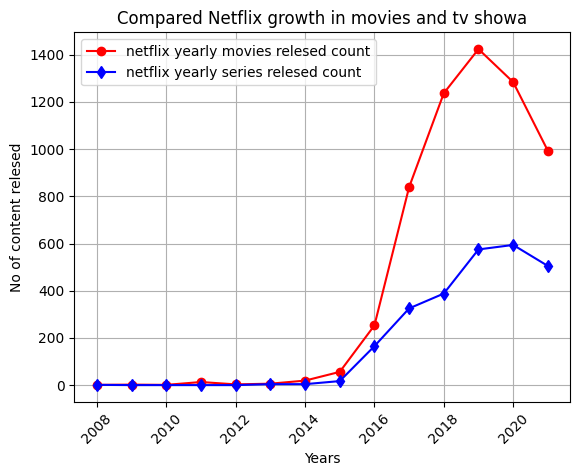

In [7]:
total_reles_year = (
    data.groupby(data["date_added"].dt.year)["type"]
    .value_counts()
    .unstack(fill_value=0)
)
plt.plot(
    total_reles_year.index,
    total_reles_year["Movie"],
    color="red",
    linestyle="-",
    marker="o",
    label="netflix yearly movies relesed count",
)
plt.plot(
    total_reles_year.index,
    total_reles_year["TV Show"],
    color="blue",
    linestyle="-",
    marker="d",
    label="netflix yearly series relesed count",
)
plt.title("Compared Netflix growth in movies and tv showa")
plt.xlabel("Years")
plt.ylabel("No of content relesed")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

### Practice Question 4

Goal: Explore content distribution by rating


In [8]:
data.fillna({"rating": "unknown"}, inplace=True)

valid_ratings = {
    "G",
    "PG",
    "PG-13",
    "R",
    "NC-17",
    "NR",
    "TV-Y",
    "TV-Y7",
    "TV-Y7-FV",
    "TV-G",
    "TV-PG",
    "TV-14",
    "TV-MA",
}
data["rating"] = data["rating"].apply(lambda x: x if x in valid_ratings else "unknown")
content_by_rating = data.groupby("rating")["type"].value_counts().unstack(fill_value=0)

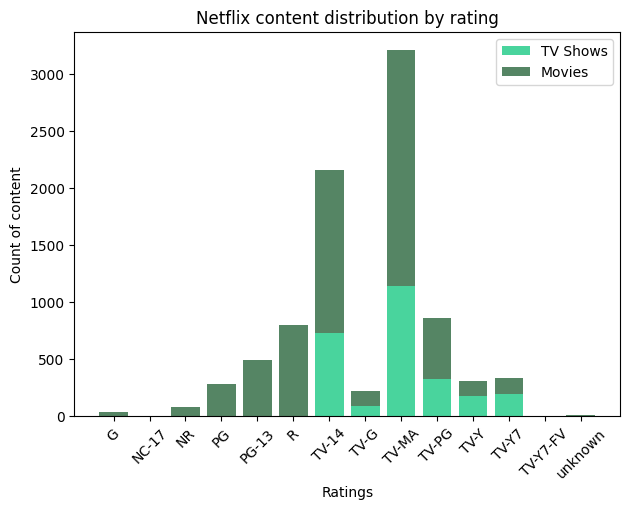

In [9]:
plt.bar(
    content_by_rating.index,
    content_by_rating["TV Show"],
    color="#49D49D",
    label="TV Shows",
)
plt.bar(
    content_by_rating.index,
    content_by_rating["Movie"],
    bottom=content_by_rating["TV Show"],
    color="#558564",
    label="Movies",
)
plt.title("Netflix content distribution by rating")
plt.xlabel("Ratings")
plt.ylabel("Count of content")
plt.tight_layout()
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Practice Question 5

Goal: Visualize top producing countries on Netflix.


In [10]:
data.fillna({"country": "unknown"}, inplace=True)
top_contries = (
    data.groupby("country")["type"]
    .value_counts()
    .unstack(fill_value=0)
    .sum(axis=1)
    .nlargest(10)
    .iloc[::-1]
)

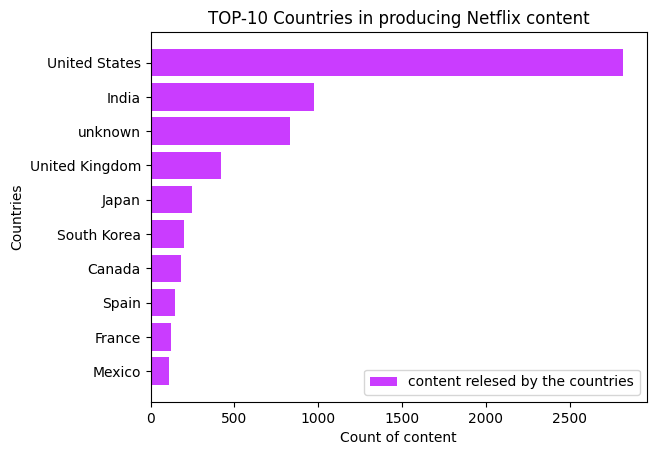

In [11]:
plt.barh(
    top_contries.index,
    top_contries.values,
    color="#CA3CFF",
    label="content relesed by the countries",
)
plt.title("TOP-10 Countries in producing Netflix content")
plt.xlabel("Count of content")
plt.ylabel("Countries")
plt.legend()
plt.show()

### Practice Question 6

Goal: Explore Netflix’s content duration


In [12]:
tv_shows = data[data["type"] == "TV Show"].copy()
tv_shows["seasons"] = tv_shows["duration"].str.extract(r"(\d+)").astype(int)
seasons_count = tv_shows["seasons"].value_counts().sort_index()


data.fillna({"duration": "0"}, inplace=True)

movies = data[data["type"] == "Movie"].copy()
movies["minutes"] = movies["duration"].str.extract(r"(\d+)").astype(int)

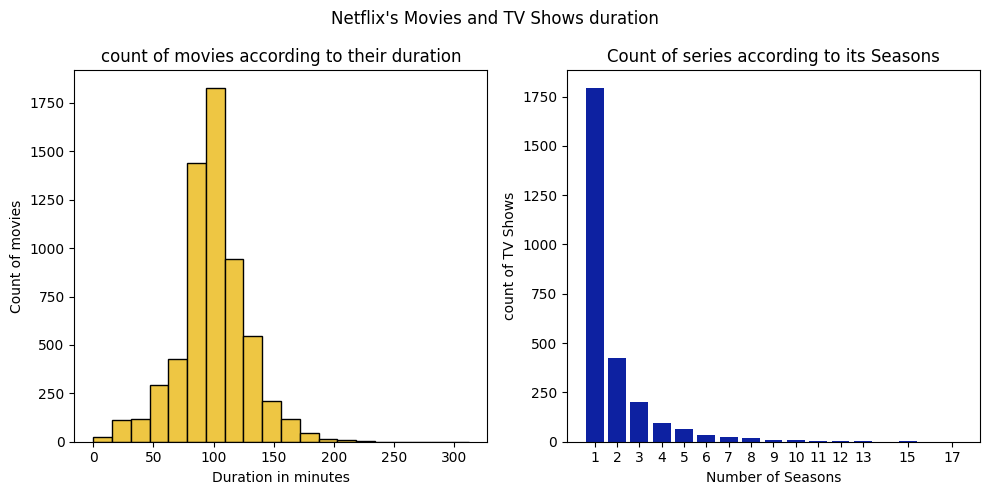

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(movies["minutes"], bins=20, color="#EEC643", edgecolor="black")
ax[0].set_title("count of movies according to their duration")
ax[0].set_xlabel("Duration in minutes")
ax[0].set_ylabel("Count of movies")

ax[1].bar(
    seasons_count.index,
    seasons_count.values,
    color="#0D21A1",
)
ax[1].set_title("Count of series according to its Seasons")
ax[1].set_xlabel("Number of Seasons")
ax[1].set_ylabel("count of TV Shows")
ax[1].set_xticks(seasons_count.index)
ax[1].set_xticklabels(seasons_count.index.astype(int))

fig.suptitle("Netflix's Movies and TV Shows duration")
plt.tight_layout()
plt.show()

### Practice Question 7

Goal: Explore Netflix genres (listed_in)


In [14]:
df = data.assign(genre=data["listed_in"].str.split(",")).explode("genre")
df["genre"] = df["genre"].str.strip()

top_genres = (
    df.groupby("genre")["type"]
    .value_counts()
    .unstack(fill_value=0)
    .sum(axis=1)
    .nlargest(10)
    .iloc[::-1]
)

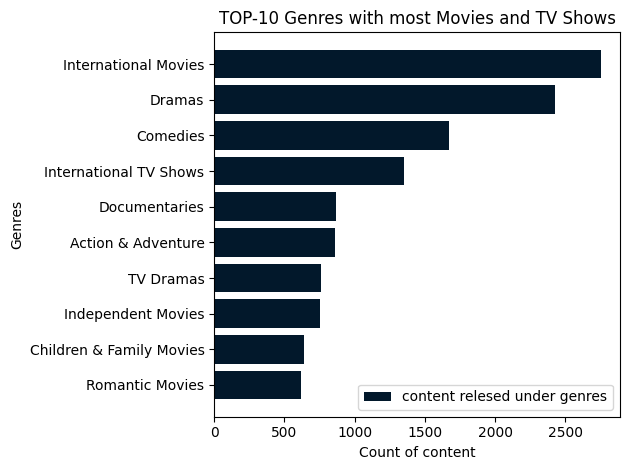

In [15]:
plt.barh(
    top_genres.index,
    top_genres.values,
    color="#02182B",
    label="content relesed under genres",
)
plt.title("TOP-10 Genres with most Movies and TV Shows")
plt.xlabel("Count of content")
plt.ylabel("Genres")
plt.tight_layout()
plt.legend()
plt.show()

### Practice Question 8

Goal: Compare top genres for Movies vs TV Shows separately.


In [16]:
top_moive_genres = (
    df[df["type"] == "Movie"].groupby("genre").size().nlargest(5).iloc[::-1]
)
top_shows_genres = (
    df[df["type"] == "TV Show"].groupby("genre").size().nlargest(5).iloc[::-1]
)

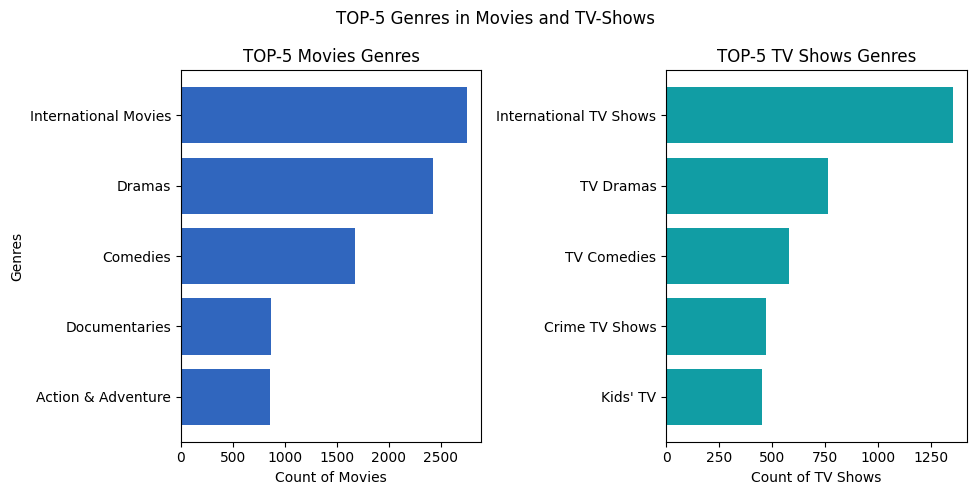

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].barh(top_moive_genres.index, top_moive_genres.values, color="#3066BE")
ax[0].set_title("TOP-5 Movies Genres")
ax[0].set_xlabel("Count of Movies")
ax[0].set_ylabel("Genres")

ax[1].barh(top_shows_genres.index, top_shows_genres.values, color="#119DA4")
ax[1].set_title("TOP-5 TV Shows Genres")
ax[1].set_xlabel("Count of TV Shows")


fig.suptitle("TOP-5 Genres in Movies and TV-Shows")
plt.tight_layout()
plt.show()

### Practice Question 9

Goal: Analyze collaboration by directors.


In [18]:
df = data.assign(director_name=data["director"].str.split(",")).explode("director_name")
df["director_name"] = df["director_name"].str.strip()

top_movies_directors = (
    df[(df["type"] == "Movie") & (df["director_name"] != "unknown")]
    .groupby("director_name")
    .size()
    .nlargest(10)
    .iloc[::-1]
)
top_shows_directors = (
    df[(df["type"] == "TV Show") & (df["director_name"] != "unknown")]
    .groupby("director_name")
    .size()
    .nlargest(10)
    .iloc[::-1]
)

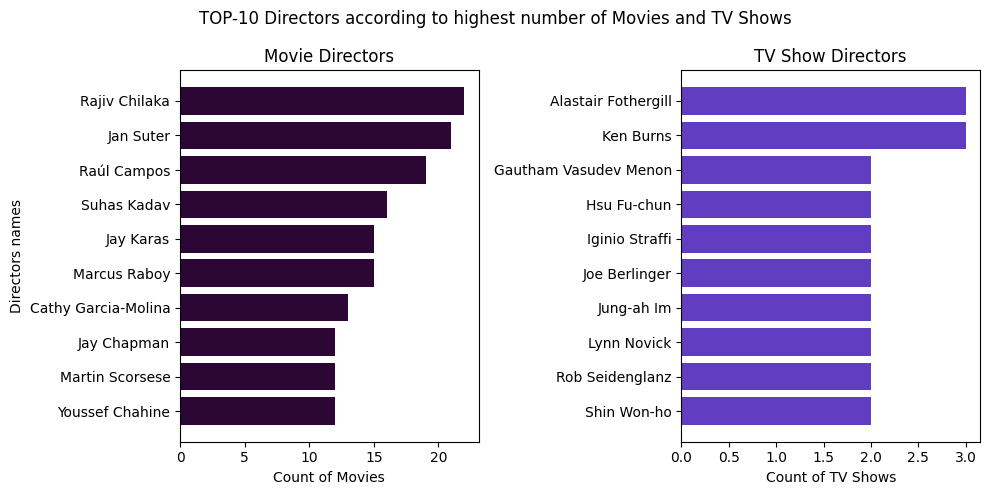

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].barh(top_movies_directors.index, top_movies_directors.values, color="#2C0735")
ax[0].set_title("Movie Directors")
ax[0].set_xlabel("Count of Movies")
ax[0].set_ylabel("Directors names")

ax[1].barh(top_shows_directors.index, top_shows_directors.values, color="#613DC1")
ax[1].set_title("TV Show Directors")
ax[1].set_xlabel("Count of TV Shows")


fig.suptitle("TOP-10 Directors according to highest number of Movies and TV Shows")
plt.tight_layout()
plt.show()

### Practice Question 10

Goal: Explore Netflix’s temporal trends by ratings.

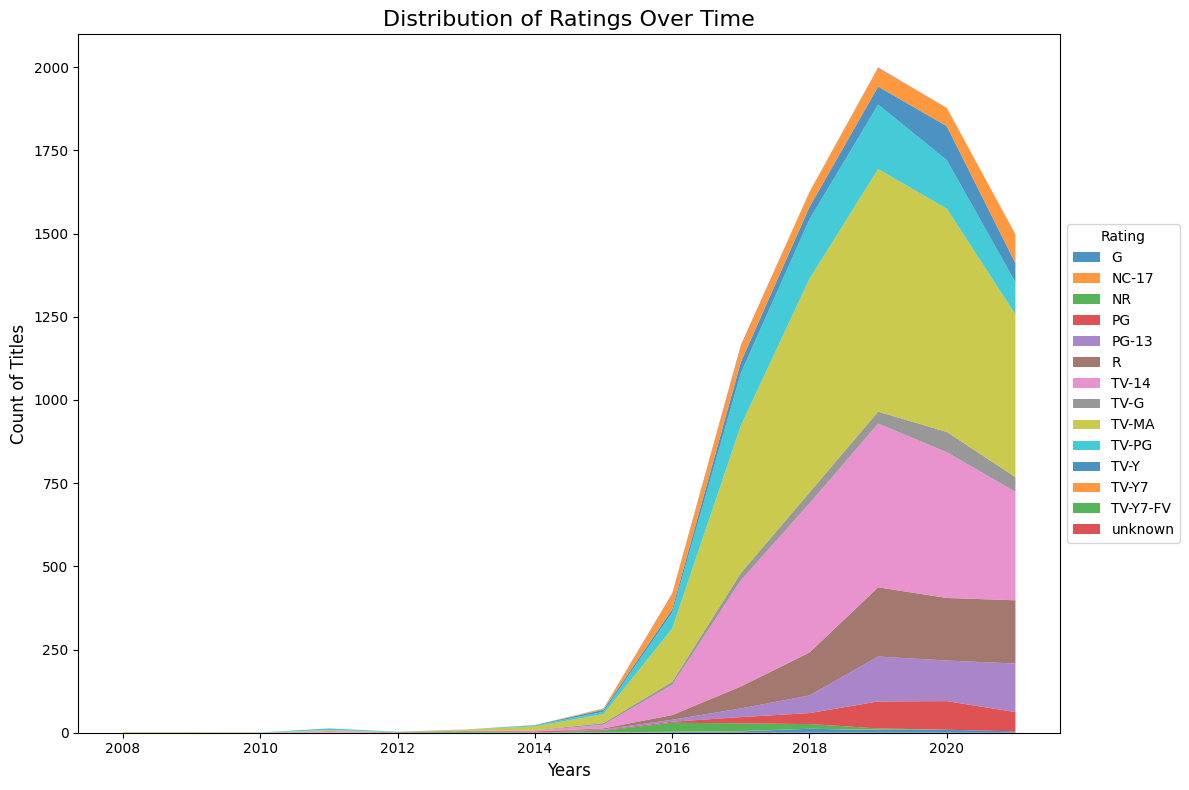

In [20]:
yrc = data.groupby([data["date_added"].dt.year, "rating"]).size().unstack(fill_value=0)


plt.figure(figsize=(12, 8))
avalable_ratings = [col for col in yrc.columns if col in yrc.columns]

plt.stackplot(
    yrc.index,
    *[yrc[rating] for rating in avalable_ratings],
    labels=avalable_ratings,
    alpha=0.8
)
plt.title("Distribution of Ratings Over Time", fontsize=16)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Count of Titles", fontsize=12)
plt.legend(title="Rating", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# plt.savefig("pirchart.png", dpi=300, bbox_inches="tight")
plt.show()

### Practice Question 11

Goal: Explore seasonality in Netflix additions.

In [21]:
mrt = data.groupby([data["date_added"].dt.month, "type"]).size().unstack(fill_value=0)
sum_mrt = mrt.sum(axis=1)

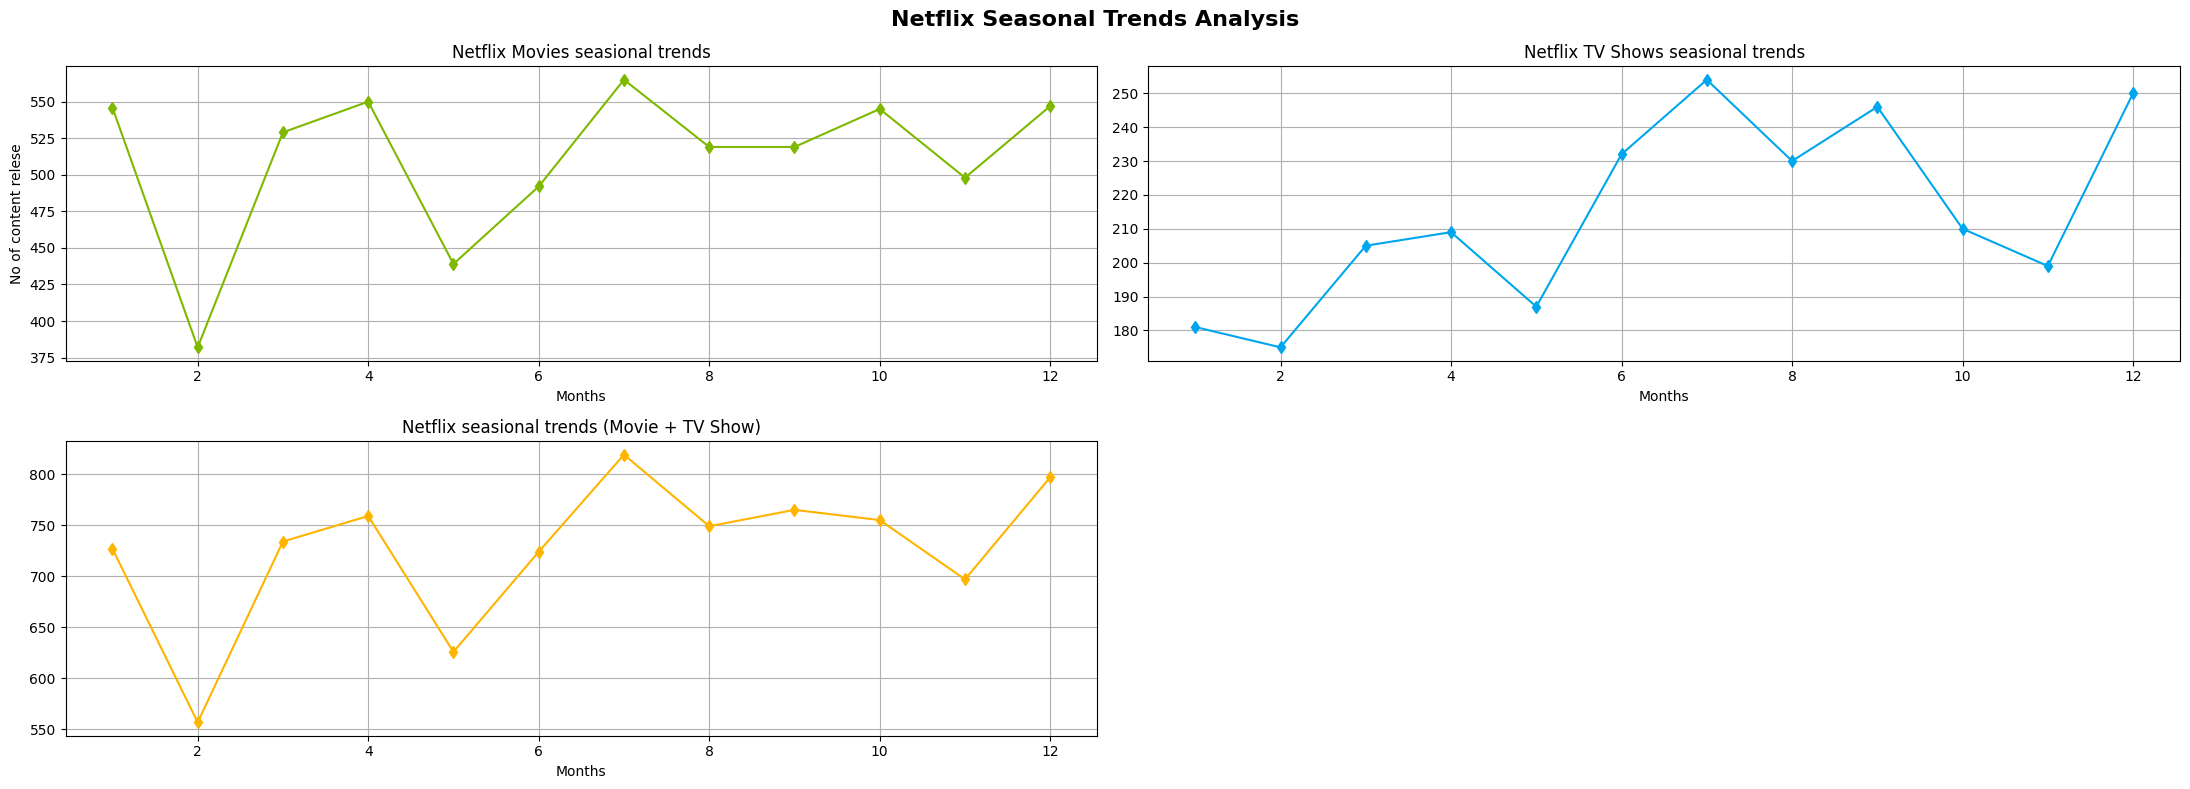

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(22, 8))

ax[0, 0].plot(
    mrt.index, mrt["Movie"], color="#7FB800", linestyle="-", marker="d", label="Movies"
)
ax[0, 0].set_xlabel("Months")
ax[0, 0].set_ylabel("No of content relese")
ax[0, 0].set_title("Netflix Movies seasional trends")
ax[0, 0].grid()

ax[0, 1].plot(
    mrt.index,
    mrt["TV Show"],
    color="#00A6ED",
    linestyle="-",
    marker="d",
    label="TV Show",
)
ax[0, 1].set_xlabel("Months")
ax[0, 1].set_title("Netflix TV Shows seasional trends")
ax[0, 1].grid()

ax[1, 0].plot(
    sum_mrt.index,
    sum_mrt.values,
    color="#FFB400",
    linestyle="-",
    marker="d",
    label="Content",
)
ax[1, 0].set_xlabel("Months")
ax[1, 0].set_title("Netflix seasional trends (Movie + TV Show)")
ax[1, 0].grid()

ax[1, 1].axis("off")

plt.subplots_adjust(top=0.93)
plt.suptitle("Netflix Seasonal Trends Analysis", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

### Practice Question 12:

Goal: Analyze the average duration of Movies per year

In [23]:
mv_data = data[data["type"] == "Movie"].copy()
mv_data["duration_min"] = mv_data["duration"].str.extract(r"(\d+)").astype(int)
adm = mv_data.groupby([mv_data["date_added"].dt.year])["duration_min"].mean(
    numeric_only=True
)

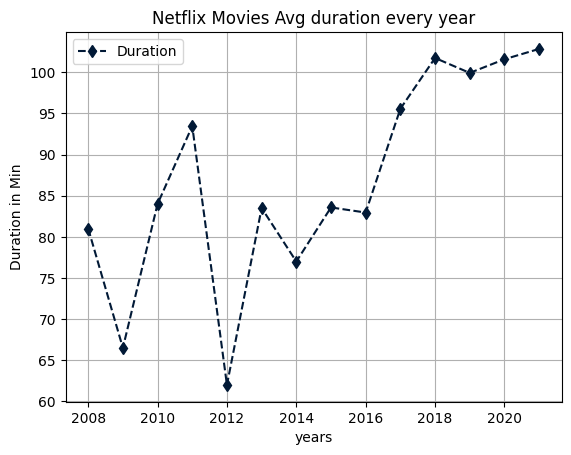

In [24]:
plt.plot(adm.index, adm.values,color="#011936", linestyle="--", marker="d",label="Duration")
plt.title("Netflix Movies Avg duration every year")
plt.xlabel("years")
plt.ylabel("Duration in Min")
plt.grid()
plt.legend()
plt.show()

### Practice Question 13:

Goal: Analyze average TV Show seasons per year.

In [25]:
tv_data = data[data["type"] == "TV Show"].copy()
tv_data["num_seasons"] = tv_data["duration"].str.extract(r"(\d+)").astype(int)

avg_seas_perY=tv_data.groupby([tv_data["date_added"].dt.year])["num_seasons"].mean()


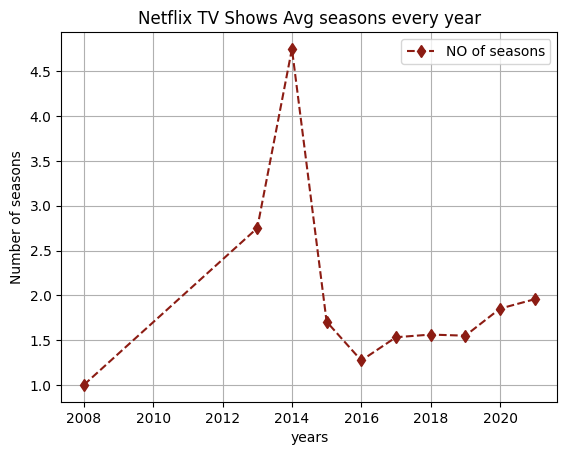

In [26]:
plt.plot(avg_seas_perY.index, avg_seas_perY.values,color="#8C1C13", linestyle="--", marker="d",label="NO of seasons")
plt.title("Netflix TV Shows Avg seasons every year")
plt.xlabel("years")
plt.ylabel("Number of seasons")
plt.grid()
plt.legend()
plt.show()